<h1><center> Challenge Alura - Data Science - Alura Cash </center></h1>
<h1><center> ETAPA III </center></h1>

Essa etapa do Challenge consistirá na geração de modelos de machine learning para predição de inadimplência.

<h2><center> Importação da base de dados</center></h2>

In [2]:
import pandas as pd

In [14]:
dados = pd.read_csv('../SILVER/dados_ml.csv', index_col='Unnamed: 0')

In [15]:
dados.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,cb_person_default_on_file,cb_person_cred_hist_length
0,27,68000,Rent,4.0,Homeimprovement,A,8700,7.88,0,0,5
1,24,12600,Rent,2.0,Venture,C,2500,13.11,1,1,2
2,30,100000,Rent,13.0,Debtconsolidation,A,12000,7.88,0,0,9
4,30,110400,Rent,1.0,Venture,D,14000,16.89,1,0,6
5,31,26988,Rent,0.0,Venture,A,5800,6.62,0,0,9


In [17]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29673 entries, 0 to 34500
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  29673 non-null  int64  
 1   person_income               29673 non-null  int64  
 2   person_home_ownership       29673 non-null  object 
 3   person_emp_length           29673 non-null  float64
 4   loan_intent                 29673 non-null  object 
 5   loan_grade                  29673 non-null  object 
 6   loan_amnt                   29673 non-null  int64  
 7   loan_int_rate               29673 non-null  float64
 8   loan_status                 29673 non-null  int64  
 9   cb_person_default_on_file   29673 non-null  int64  
 10  cb_person_cred_hist_length  29673 non-null  int64  
dtypes: float64(2), int64(6), object(3)
memory usage: 2.7+ MB


<h2><center> Separando variável alvo </center></h2>

Variável alvo: loan_status

In [19]:
X = dados.drop('loan_status',axis=1)
y = dados.loan_status

In [20]:
X.shape

(29673, 10)

In [21]:
y.shape

(29673,)

<h2><center>Aplicando encoding nas variáveis categóricas</center></h2>

In [22]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

In [23]:
dados.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'cb_person_default_on_file',
       'cb_person_cred_hist_length'],
      dtype='object')

In [24]:
variaveis_categoricas = ['person_home_ownership','loan_intent','loan_grade']

In [25]:
ohe = make_column_transformer(
    (OneHotEncoder(), variaveis_categoricas),
    remainder='passthrough')

dados_ohe = ohe.fit_transform(X)

In [26]:
dados_ohe = pd.DataFrame(dados_ohe, columns=ohe.get_feature_names_out())
dados_ohe.head()

,onehotencoder__person_home_ownership_Mortgage,onehotencoder__person_home_ownership_Other,onehotencoder__person_home_ownership_Own,onehotencoder__person_home_ownership_Rent,onehotencoder__loan_intent_Debtconsolidation,onehotencoder__loan_intent_Education,onehotencoder__loan_intent_Homeimprovement,onehotencoder__loan_intent_Medical,onehotencoder__loan_intent_Personal,onehotencoder__loan_intent_Venture,...,onehotencoder__loan_grade_E,onehotencoder__loan_grade_F,onehotencoder__loan_grade_G,remainder__person_age,remainder__person_income,remainder__person_emp_length,remainder__loan_amnt,remainder__loan_int_rate,remainder__cb_person_default_on_file,remainder__cb_person_cred_hist_length
0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,27.0,68000.0,4.0,8700.0,7.88,0.0,5.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,24.0,12600.0,2.0,2500.0,13.11,1.0,2.0
2,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,30.0,100000.0,13.0,12000.0,7.88,0.0,9.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,30.0,110400.0,1.0,14000.0,16.89,0.0,6.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,31.0,26988.0,0.0,5800.0,6.62,0.0,9.0


In [27]:
dados_ohe.describe()

,onehotencoder__person_home_ownership_Mortgage,onehotencoder__person_home_ownership_Other,onehotencoder__person_home_ownership_Own,onehotencoder__person_home_ownership_Rent,onehotencoder__loan_intent_Debtconsolidation,onehotencoder__loan_intent_Education,onehotencoder__loan_intent_Homeimprovement,onehotencoder__loan_intent_Medical,onehotencoder__loan_intent_Personal,onehotencoder__loan_intent_Venture,...,onehotencoder__loan_grade_E,onehotencoder__loan_grade_F,onehotencoder__loan_grade_G,remainder__person_age,remainder__person_income,remainder__person_emp_length,remainder__loan_amnt,remainder__loan_int_rate,remainder__cb_person_default_on_file,remainder__cb_person_cred_hist_length
count,29673.000000,29673.000000,29673.000000,29673.000000,29673.000000,29673.000000,29673.000000,29673.000000,29673.000000,29673.000000,...,29673.000000,29673.000000,29673.000000,29673.000000,29673.000000,29673.000000,29673.000000,29673.000000,29673.000000,29673.000000
mean,0.411249,0.003168,0.080174,0.505409,0.159977,0.198699,0.111617,0.184949,0.170054,0.174704,...,0.029994,0.007246,0.001988,27.693290,65319.840731,4.628922,9584.593738,11.009660,0.176929,5.784889
std,0.492069,0.056195,0.271567,0.499979,0.366591,0.399028,0.314899,0.388263,0.375686,0.379720,...,0.170572,0.084814,0.044547,6.147853,46992.456009,4.052696,6316.996501,3.240204,0.381615,4.022156
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,20.000000,0.000000,0.000000,500.000000,5.420000,0.000000,2.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,23.000000,38400.000000,2.000000,5000.000000,7.900000,0.000000,3.000000
50%,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,26.000000,55000.000000,4.000000,8000.000000,10.990000,0.000000,4.000000
75%,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,30.000000,79000.000000,7.000000,12250.000000,13.470000,0.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,78.000000,948000.000000,38.000000,35000.000000,23.220000,1.000000,30.000000


<center><h2> Normalizando os dados </center></h2>

As variáveis possuem diferentes escalas uma em relação a outra, portanto se faz necessário a normalização dos dados a fim de torná-las comparáveis entre si.

In [28]:
from sklearn.preprocessing import MinMaxScaler

In [29]:
scaler = MinMaxScaler()
dados_normalizados = scaler.fit_transform(dados_ohe)
dados_normalizados = pd.DataFrame(dados_normalizados, columns=dados_ohe.columns)

In [30]:
dados_normalizados.head()

,onehotencoder__person_home_ownership_Mortgage,onehotencoder__person_home_ownership_Other,onehotencoder__person_home_ownership_Own,onehotencoder__person_home_ownership_Rent,onehotencoder__loan_intent_Debtconsolidation,onehotencoder__loan_intent_Education,onehotencoder__loan_intent_Homeimprovement,onehotencoder__loan_intent_Medical,onehotencoder__loan_intent_Personal,onehotencoder__loan_intent_Venture,...,onehotencoder__loan_grade_E,onehotencoder__loan_grade_F,onehotencoder__loan_grade_G,remainder__person_age,remainder__person_income,remainder__person_emp_length,remainder__loan_amnt,remainder__loan_int_rate,remainder__cb_person_default_on_file,remainder__cb_person_cred_hist_length
0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.120690,0.071730,0.105263,0.237681,0.138202,0.0,0.107143
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.068966,0.013291,0.052632,0.057971,0.432022,1.0,0.000000
2,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.172414,0.105485,0.342105,0.333333,0.138202,0.0,0.250000
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.172414,0.116456,0.026316,0.391304,0.644382,0.0,0.142857
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.189655,0.028468,0.000000,0.153623,0.067416,0.0,0.250000


In [31]:
dados_normalizados.describe()

,onehotencoder__person_home_ownership_Mortgage,onehotencoder__person_home_ownership_Other,onehotencoder__person_home_ownership_Own,onehotencoder__person_home_ownership_Rent,onehotencoder__loan_intent_Debtconsolidation,onehotencoder__loan_intent_Education,onehotencoder__loan_intent_Homeimprovement,onehotencoder__loan_intent_Medical,onehotencoder__loan_intent_Personal,onehotencoder__loan_intent_Venture,...,onehotencoder__loan_grade_E,onehotencoder__loan_grade_F,onehotencoder__loan_grade_G,remainder__person_age,remainder__person_income,remainder__person_emp_length,remainder__loan_amnt,remainder__loan_int_rate,remainder__cb_person_default_on_file,remainder__cb_person_cred_hist_length
count,29673.000000,29673.000000,29673.000000,29673.000000,29673.000000,29673.000000,29673.000000,29673.000000,29673.000000,29673.000000,...,29673.000000,29673.000000,29673.000000,29673.000000,29673.000000,29673.000000,29673.000000,29673.000000,29673.000000,29673.000000
mean,0.411249,0.003168,0.080174,0.505409,0.159977,0.198699,0.111617,0.184949,0.170054,0.174704,...,0.029994,0.007246,0.001988,0.132643,0.068903,0.121814,0.263322,0.314026,0.176929,0.135175
std,0.492069,0.056195,0.271567,0.499979,0.366591,0.399028,0.314899,0.388263,0.375686,0.379720,...,0.170572,0.084814,0.044547,0.105997,0.049570,0.106650,0.183101,0.182034,0.381615,0.143648
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.051724,0.040506,0.052632,0.130435,0.139326,0.000000,0.035714
50%,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.103448,0.058017,0.105263,0.217391,0.312921,0.000000,0.071429
75%,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.172414,0.083333,0.184211,0.340580,0.452247,0.000000,0.214286
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<h2><center> Separando base de treino e teste </center></h2>

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
SEED = 42
X_train, X_test, y_train, y_test = train_test_split(dados_normalizados, y, random_state=SEED, stratify=y)

In [35]:
X_train.shape

(22254, 24)

In [36]:
y_train.shape

(22254,)

In [37]:
X_test.shape

(7419, 24)

In [38]:
y_test.shape

(7419,)

<h2><center> Balanceamento dos dados </center></h2>

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

c:\users\pichau\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='loan_status', ylabel='count'>

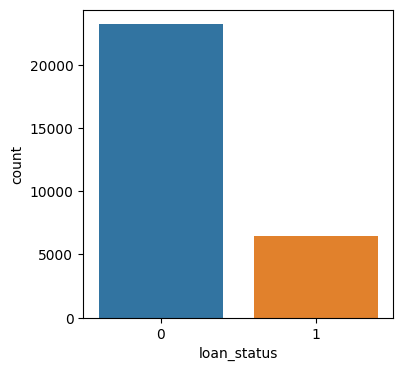

In [49]:
plt.figure(figsize=(4,4))
sns.countplot(y)

A variável alvo (loan_status) econtra-se desbalanceada, o que pode prejudicar o modelo. Portanto, aplicaremos uma técnica de oversampling para balancear os dados.

In [65]:
from imblearn.over_sampling import RandomOverSampler

In [66]:
oversampling = RandomOverSampler(random_state=SEED)
X_balanced, y_balanced = oversampling.fit_resample(X_train, y_train)
X_balanced.head()

,onehotencoder__person_home_ownership_Mortgage,onehotencoder__person_home_ownership_Other,onehotencoder__person_home_ownership_Own,onehotencoder__person_home_ownership_Rent,onehotencoder__loan_intent_Debtconsolidation,onehotencoder__loan_intent_Education,onehotencoder__loan_intent_Homeimprovement,onehotencoder__loan_intent_Medical,onehotencoder__loan_intent_Personal,onehotencoder__loan_intent_Venture,...,onehotencoder__loan_grade_E,onehotencoder__loan_grade_F,onehotencoder__loan_grade_G,remainder__person_age,remainder__person_income,remainder__person_emp_length,remainder__loan_amnt,remainder__loan_int_rate,remainder__cb_person_default_on_file,remainder__cb_person_cred_hist_length
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.086207,0.101266,0.263158,0.565217,0.088202,0.0,0.035714
1,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.068966,0.068143,0.052632,0.130435,0.139326,0.0,0.071429
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.068966,0.045886,0.026316,0.072464,0.144944,0.0,0.000000
3,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.068966,0.065928,0.131579,0.318841,0.020787,0.0,0.035714
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.155172,0.210970,0.368421,0.449275,0.408427,0.0,0.178571


c:\users\pichau\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='loan_status', ylabel='count'>

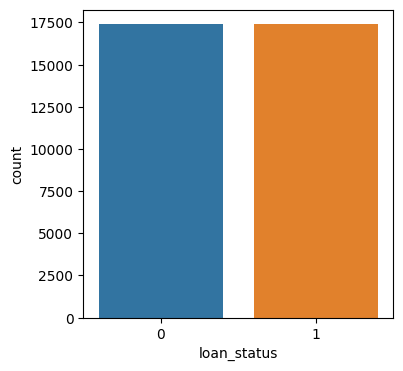

In [67]:
plt.figure(figsize=(4,4))
sns.countplot(y_balanced)

<h2><center>Modelos Machine Learning</center></h2>

Com os dados normalizados e balanceados, aplicaremos três modelos de ML a fim de comparar os resultados e selecionar o melhor modelo:
    
    - Gradient Boosting Classifier
    - Decision Tree Classifier
    - Logistic Regression



In [61]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

### Gradient Boosting Classifier

In [56]:
from sklearn.ensemble import GradientBoostingClassifier 

In [62]:
gbc = GradientBoostingClassifier(random_state=SEED)

gbc.fit(X_balanced, y_balanced)
predict_gbc = gbc.predict(X_test)
print(metrics.classification_report(y_test, predict_gbc))

              precision    recall  f1-score   support

           0       0.94      0.86      0.90      5799
           1       0.62      0.82      0.70      1620

    accuracy                           0.85      7419
   macro avg       0.78      0.84      0.80      7419
weighted avg       0.87      0.85      0.86      7419



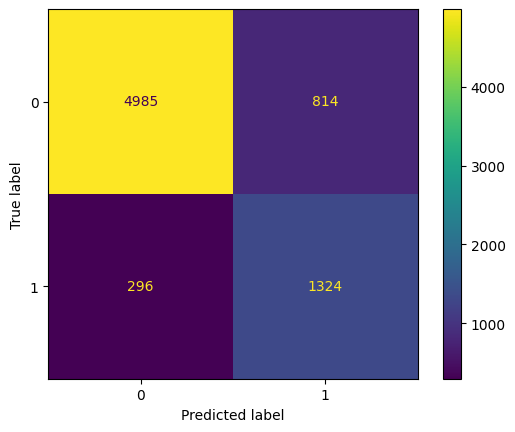

In [63]:
ConfusionMatrixDisplay.from_estimator(gbc, X_test, y_test,)
plt.grid(False)
plt.show()

## Decision Tree Classifier

In [68]:
from sklearn.tree import DecisionTreeClassifier

In [70]:
dtc = DecisionTreeClassifier(random_state=SEED)
dtc.fit(X_balanced, y_balanced)
predict_dtc = dtc.predict(X_test)
print(metrics.classification_report(y_test, predict_dtc))

              precision    recall  f1-score   support

           0       0.93      0.92      0.92      5799
           1       0.72      0.74      0.73      1620

    accuracy                           0.88      7419
   macro avg       0.82      0.83      0.83      7419
weighted avg       0.88      0.88      0.88      7419



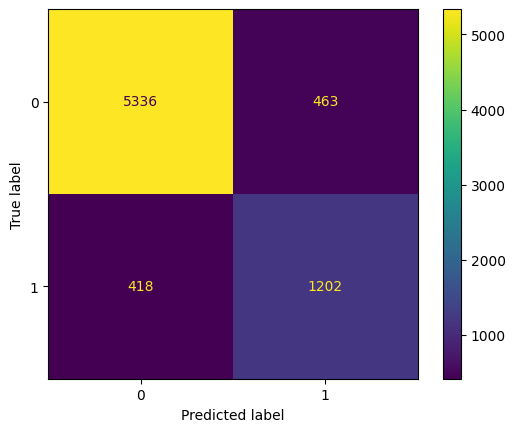

In [71]:
ConfusionMatrixDisplay.from_estimator(dtc, X_test, y_test,)
plt.grid(False)
plt.show()

## Logistic Regression

In [72]:
from sklearn.linear_model import LogisticRegression

In [77]:
lr = LogisticRegression(random_state=SEED, max_iter=1000)
lr.fit(X_balanced,y_balanced)
predict_lr = lr.predict(X_test)
print(metrics.classification_report(y_test, predict_lr))

              precision    recall  f1-score   support

           0       0.93      0.78      0.85      5799
           1       0.50      0.78      0.61      1620

    accuracy                           0.78      7419
   macro avg       0.71      0.78      0.73      7419
weighted avg       0.83      0.78      0.79      7419



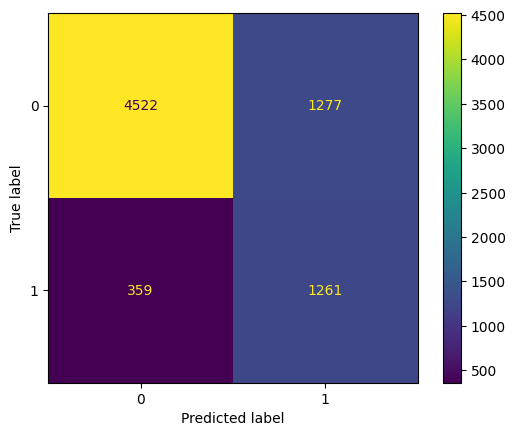

In [78]:
ConfusionMatrixDisplay.from_estimator(lr, X_test, y_test,)
plt.grid(False)
plt.show()

<h2><center> Comparação dos modelos </center></h2>

In [ ]:
from sklearn.metrics import recall_score

In [83]:
metricas_over = pd.DataFrame({'Acurácia treino':[dtc.score(X_balanced, y_balanced), 
                                 gbc.score(X_balanced, y_balanced), 
                                 lr.score(X_balanced, y_balanced)], 
            'Acurácia teste': [dtc.score(X_test, y_test), 
                                 gbc.score(X_test, y_test), 
                                 lr.score(X_test, y_test)], 
            'Recall':[recall_score(y_test, predict_dtc),
                      recall_score(y_test, predict_gbc ),
                      recall_score(y_test, predict_lr)]},
             index = ['Árvore de Decisão', 'Gradient Boosting', 'Regressão Logísitica'])

In [84]:
metricas_over

,Acurácia treino,Acurácia teste,Recall
Árvore de Decisão,1.000000,0.881251,0.741975
Gradient Boosting,0.843739,0.850384,0.817284
Regressão Logísitica,0.771559,0.779485,0.778395


Comparando os modelos, podemos concluir que o modelo com o melhor desempenho é o Gradient Boosting Classifier, pois apresenta a maior taxa de recall e o valor das acurácias pro treino e teste são próximos e consideravelmente altos.

O modelo Decision Tree Classifier apresenta uma alta acurácia pro treino e pro teste, porém distantes entre si, o que indica um Overfit.

O modelo de Logistic Regression, apesar de não apresentar indícios de Overfit, tem o menor valor de acurácia e recall entre os três modelos.

<h2><center> Otimização dos hiperparâmetros </center></h2>

In [85]:
from sklearn.model_selection import GridSearchCV
import numpy as np

In [86]:
parameters = {
    "loss":["deviance"],
    "max_depth":[3,5,8],
    "max_features":["log2","sqrt"],
    "criterion": ["friedman_mse",  "absolute_error"],
    "subsample":[0.5, 0.618, 0.8, 0.85, 0.9],
    "n_estimators":[10,100]
    }

In [88]:
grid_search = GridSearchCV(GradientBoostingClassifier(random_state = SEED), parameters,scoring='recall',cv=3,verbose = 1)

grid_search.fit(X_balanced, y_balanced)

Fitting 3 folds for each of 120 candidates, totalling 360 fits


c:\users\pichau\appdata\local\programs\python\python38\lib\site-packages\sklearn\ensemble\_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(
c:\users\pichau\appdata\local\programs\python\python38\lib\site-packages\sklearn\ensemble\_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(
c:\users\pichau\appdata\local\programs\python\python38\lib\site-packages\sklearn\ensemble\_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(
c:\users\pichau\appdata\local\programs\python\python38\lib\site-packages\sklearn\ensemble\_gb.py:310: FutureWarning: The loss parameter nam

c:\users\pichau\appdata\local\programs\python\python38\lib\site-packages\sklearn\ensemble\_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(
c:\users\pichau\appdata\local\programs\python\python38\lib\site-packages\sklearn\ensemble\_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(
c:\users\pichau\appdata\local\programs\python\python38\lib\site-packages\sklearn\ensemble\_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(
c:\users\pichau\appdata\local\programs\python\python38\lib\site-packages\sklearn\ensemble\_gb.py:310: FutureWarning: The loss parameter nam

c:\users\pichau\appdata\local\programs\python\python38\lib\site-packages\sklearn\ensemble\_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(
c:\users\pichau\appdata\local\programs\python\python38\lib\site-packages\sklearn\ensemble\_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(
c:\users\pichau\appdata\local\programs\python\python38\lib\site-packages\sklearn\ensemble\_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(
c:\users\pichau\appdata\local\programs\python\python38\lib\site-packages\sklearn\ensemble\_gb.py:310: FutureWarning: The loss parameter nam

c:\users\pichau\appdata\local\programs\python\python38\lib\site-packages\sklearn\ensemble\_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(
c:\users\pichau\appdata\local\programs\python\python38\lib\site-packages\sklearn\ensemble\_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(
c:\users\pichau\appdata\local\programs\python\python38\lib\site-packages\sklearn\ensemble\_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(
c:\users\pichau\appdata\local\programs\python\python38\lib\site-packages\sklearn\ensemble\_gb.py:310: FutureWarning: The loss parameter nam

c:\users\pichau\appdata\local\programs\python\python38\lib\site-packages\sklearn\ensemble\_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(
c:\users\pichau\appdata\local\programs\python\python38\lib\site-packages\sklearn\ensemble\_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(
c:\users\pichau\appdata\local\programs\python\python38\lib\site-packages\sklearn\ensemble\_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(
c:\users\pichau\appdata\local\programs\python\python38\lib\site-packages\sklearn\ensemble\_gb.py:310: FutureWarning: The loss parameter nam

c:\users\pichau\appdata\local\programs\python\python38\lib\site-packages\sklearn\ensemble\_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(
c:\users\pichau\appdata\local\programs\python\python38\lib\site-packages\sklearn\ensemble\_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(
c:\users\pichau\appdata\local\programs\python\python38\lib\site-packages\sklearn\ensemble\_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(
c:\users\pichau\appdata\local\programs\python\python38\lib\site-packages\sklearn\ensemble\_gb.py:310: FutureWarning: The loss parameter nam

c:\users\pichau\appdata\local\programs\python\python38\lib\site-packages\sklearn\ensemble\_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(
c:\users\pichau\appdata\local\programs\python\python38\lib\site-packages\sklearn\ensemble\_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(
c:\users\pichau\appdata\local\programs\python\python38\lib\site-packages\sklearn\ensemble\_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(
c:\users\pichau\appdata\local\programs\python\python38\lib\site-packages\sklearn\ensemble\_gb.py:310: FutureWarning: The loss parameter nam

GridSearchCV(cv=3, estimator=GradientBoostingClassifier(random_state=42),
             param_grid={'criterion': ['friedman_mse', 'absolute_error'],
                         'loss': ['deviance'], 'max_depth': [3, 5, 8],
                         'max_features': ['log2', 'sqrt'],
                         'n_estimators': [10, 100],
                         'subsample': [0.5, 0.618, 0.8, 0.85, 0.9]},
             scoring='recall', verbose=1)

In [90]:
previsao_grid_search = grid_search.best_estimator_
previsao_grid_search

GradientBoostingClassifier(loss='deviance', max_depth=8, max_features='log2',
                           random_state=42, subsample=0.618)

In [91]:
previsao_grid = previsao_grid_search.predict(X_test)

In [92]:
print(classification_report(y_test, previsao_grid))

              precision    recall  f1-score   support

           0       0.94      0.93      0.93      5799
           1       0.76      0.77      0.77      1620

    accuracy                           0.90      7419
   macro avg       0.85      0.85      0.85      7419
weighted avg       0.90      0.90      0.90      7419



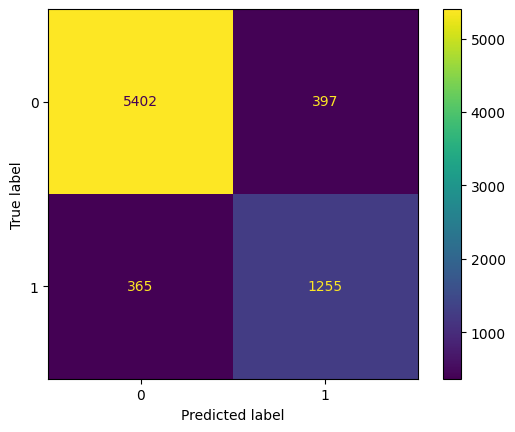

In [93]:
ConfusionMatrixDisplay.from_estimator(previsao_grid_search, X_test, y_test)
plt.grid(False)
plt.show()

Em comparação com o modelo sem a otimização dos parâmtros, nota-se que houve uma melhora significativa em relação aos clientes não inadimplentes. Entretando, houve uma piora em relação aos clientes inadimplentes.


<h2><center>Exportação do modelo</center></h2>

In [98]:
import pickle

In [100]:
with open('one_hot_enc.pkl','wb') as file:
    pickle.dump(ohe, file)

In [101]:
with open('scaler.pkl','wb') as file:
    pickle.dump(scaler, file)

In [102]:
with open('gcb.pkl','wb') as file:
    pickle.dump(previsao_grid_search, file)